In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample

def evaluate_model(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    evaluation_metrics = {
        'Confusion_Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    return evaluation_metrics

def logistic_regression_model(df, dep_variable, test_size=0.2, random_state=42, n_bootstrap=100):
    X = df.drop(columns=[dep_variable])
    y = df[dep_variable]

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the SGD logistic regression model
    logistic_regression_model = SGDClassifier(loss='log', max_iter=10000, random_state=random_state)
    logistic_regression_model.fit(X_train, y_train)
    y_pred = logistic_regression_model.predict(X_test)
    evaluation_metrics = evaluate_model(y_test, y_pred)

    # Get coefficients
    coefficients = logistic_regression_model.coef_

    # Perform bootstrapping to estimate variance of coefficients
    coef_bootstraps = []
    for _ in range(n_bootstrap):
        X_boot, y_boot = resample(X_train, y_train, random_state=random_state)
        model = SGDClassifier(loss='log', max_iter=1000, random_state=random_state)
        model.fit(X_boot, y_boot)
        coef_bootstraps.append(model.coef_)
    variance_coefficients = np.var(coef_bootstraps, axis=0)

    return logistic_regression_model, evaluation_metrics, coefficients, variance_coefficients


df = pd.read_csv('/content/FINAL_DATA_FOR_REG.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 26 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Age in 5-year groups                                               1823 non-null   int64  
 1   Child is alive                                                     1823 non-null   int64  
 2   Prenatal: ANM/nurse/midwife/LHV                                    1823 non-null   int64  
 3   Prenatal: other health personnel                                   1823 non-null   int64  
 4   Prenatal: anganwadi/ICDS worker                                    1823 non-null   int64  
 5   Prenatal: DAI/TBA                                                  1823 non-null   int64  
 6   Place of delivery                                                  1823 non-null   int64  
 7   Allowed to go to: market

In [56]:
df.dropna(inplace=True)

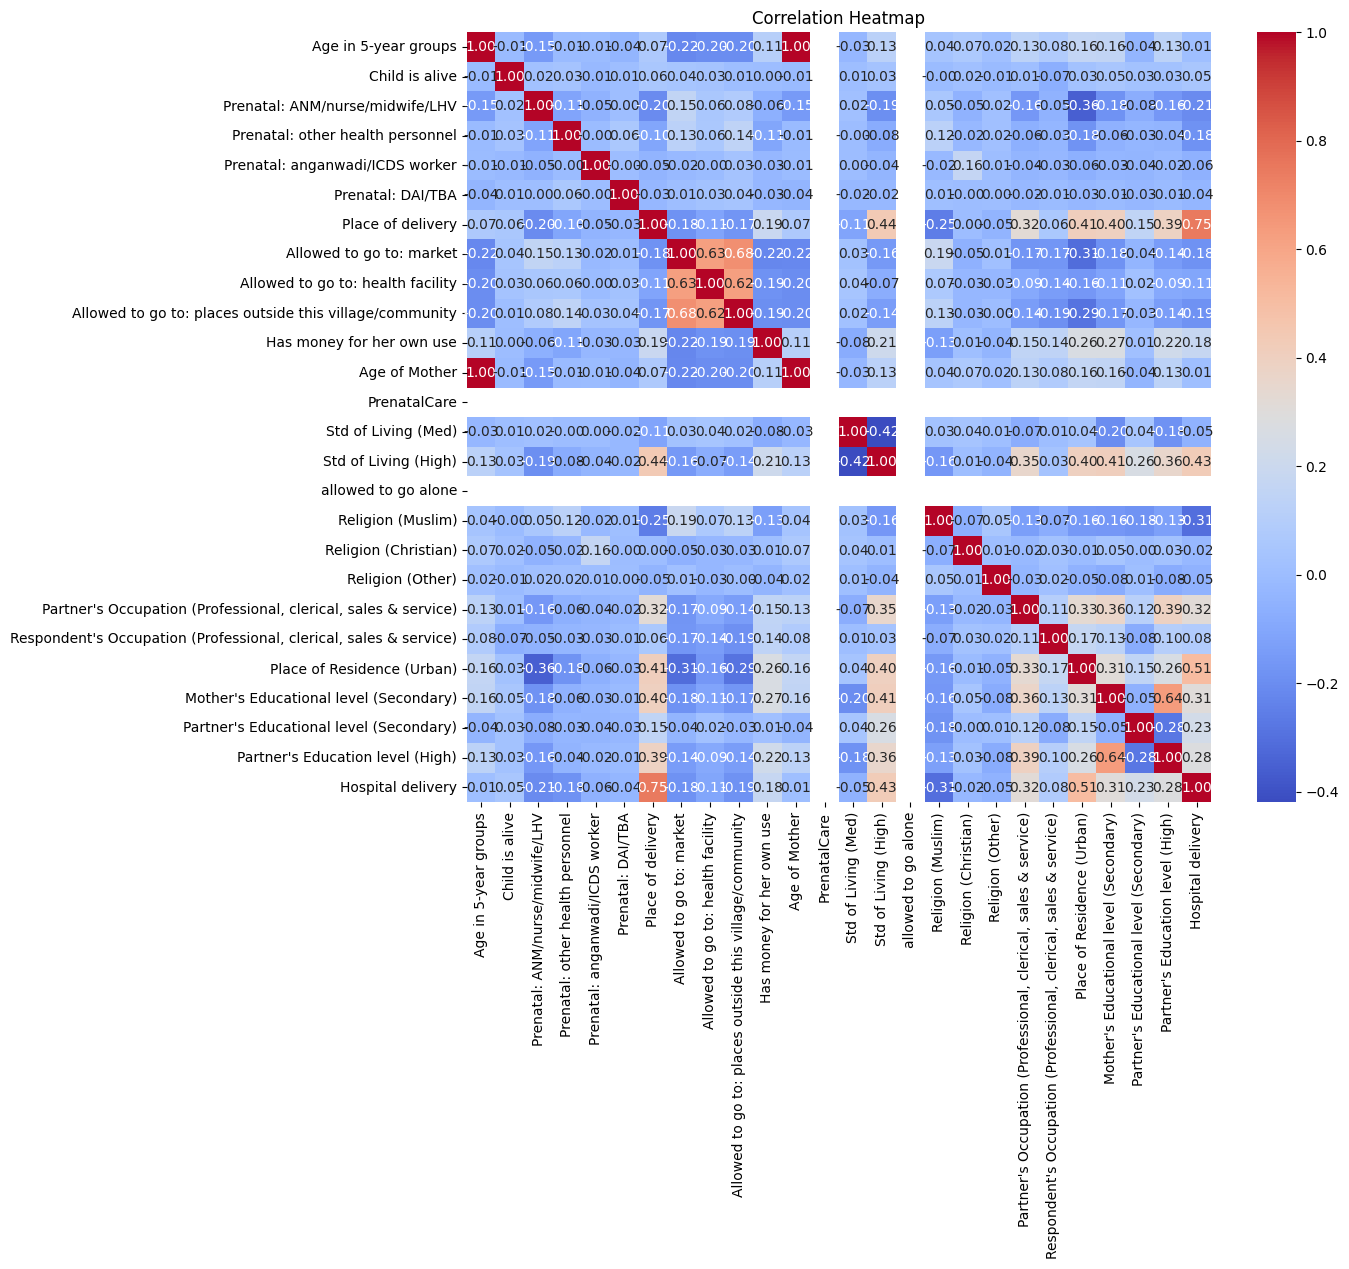

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df):
    plt.figure(figsize=(12, 10))  # Adjust the figsize as needed
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Assuming df is your DataFrame
plot_heatmap(df)


In [58]:
# df.drop(["Age of Mother"],inplace=True)
df.columns


Index(['Age in 5-year groups', 'Child is alive',
       'Prenatal: ANM/nurse/midwife/LHV', 'Prenatal: other health personnel',
       'Prenatal: anganwadi/ICDS worker', 'Prenatal: DAI/TBA',
       'Place of delivery', 'Allowed to go to: market',
       'Allowed to go to: health facility',
       'Allowed to go to: places outside this village/community',
       'Has money for her own use', 'Age of Mother', 'PrenatalCare',
       'Std of Living (Med)', 'Std of Living (High)', 'allowed to go alone',
       'Religion (Muslim)', 'Religion (Christian)', 'Religion (Other)',
       'Partner's Occupation (Professional, clerical, sales & service)',
       'Respondent's Occupation (Professional, clerical, sales & service)',
       'Place of Residence (Urban)', 'Mother's Educational level (Secondary)',
       'Partner's Educational level (Secondary)',
       'Partner's Education level (High)', 'Hospital delivery'],
      dtype='object')

In [59]:
# df.drop(columns=['Age of Mother','Allowed to go to: market',
#        'Allowed to go to: health facility',
#        'Allowed to go to: places outside this village/community','Std of Living (Med)', 'Std of Living (High)','Religion (Muslim)', 'Place of delivery',"Mother's Educational level (Secondary)",'Place of Residence (Urban)'], inplace=True)

In [61]:
regression_model_child, evaluation_metrics_child, coefficients_child, variance_coefficients_child = logistic_regression_model(df,"Child is alive")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

In [62]:
print(evaluation_metrics_child, coefficients_child, variance_coefficients_child)

{'Confusion_Matrix': array([[  0,   9],
       [  0, 356]]), 'Accuracy': 0.9753424657534246, 'Precision': 0.9512929255019704, 'Recall': 0.9753424657534246, 'F1-Score': 0.9631675944749493} [[  5.48094118   9.07006401  11.59391267  -0.75605286   0.4496454
    3.58288957   8.54297232   0.69556998  -5.01533995   3.35435139
   -0.2415525   -2.30385487   1.0966082   -3.39076307   0.
    3.55520241   4.13049533  -3.07374167  -4.31891566 -13.89336086
    4.69338185  12.24014422   0.93553889   0.35424892 -11.28645168]] [[1.23259516e-32 2.55590933e-28 1.02236373e-27 7.09974815e-30
  3.08148791e-33 7.09974815e-30 6.38977333e-29 2.83989926e-29
  0.00000000e+00 3.99360833e-30 3.99360833e-30 1.20370622e-33
  1.81753553e-27 7.88860905e-31 0.00000000e+00 2.83989926e-29
  9.66354609e-30 6.03971631e-31 6.18466950e-28 8.07793567e-28
  1.26217745e-29 0.00000000e+00 7.09974815e-30 6.18466950e-28
  5.04870979e-29]]


#pt2

In [63]:
df["PrenatalCare"].value_counts()

PrenatalCare
1    1822
Name: count, dtype: int64

In [64]:
# regression_model_PrenatalCare, evaluation_metrics_PrenatalCare, coefficients_PrenatalCare, variance_coefficients_PrenatalCare = logistic_regression_model(df,"PrenatalCare")

In [66]:
regression_model_Hospital,evaluation_metrics_Hospital, coefficients_Hospital, variance_coefficients_Hospital=logistic_regression_model(df,"Hospital delivery")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [68]:
print(evaluation_metrics_Hospital, coefficients_Hospital, variance_coefficients_Hospital)

{'Confusion_Matrix': array([[174,   1],
       [  0, 190]]), 'Accuracy': 0.9972602739726028, 'Precision': 0.9972746180879294, 'Recall': 0.9972602739726028, 'F1-Score': 0.9972599443046619} [[ 1.86766030e+01 -6.19595655e+00 -1.13387480e+01 -1.95939477e+01
  -6.85102994e-01 -4.04084159e-13  1.79596531e+01  9.12692523e+00
  -5.51419121e-02 -3.75574852e+00  3.18507582e+00 -4.26056345e+00
  -8.13696486e+00  6.46580826e+00  2.68247993e+01  0.00000000e+00
  -1.54334573e+01 -1.33575239e+00 -8.97689515e+00  1.81970645e+01
   5.19558918e+00  3.70027058e+01  1.88346920e+01  1.08060375e+01
   1.48128278e+01]] [[1.97215226e-29 0.00000000e+00 6.18466950e-28 2.01948392e-28
  8.33234331e-30 3.15544362e-30 2.55590933e-28 7.09974815e-28
  3.15544362e-30 3.77482269e-32 4.43734259e-31 3.86541844e-29
  9.66354609e-30 0.00000000e+00 2.01948392e-28 0.00000000e+00
  2.01948392e-28 6.03971631e-31 1.97215226e-29 1.81753553e-27
  2.41588652e-30 2.01948392e-28 1.13595970e-28 1.54616737e-28
  0.00000000e+00]]
